# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name --------- Description

Carat  ---------------> Carat weight of the cubic zirconia.

Cut	  ----------------> Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,      Premium, Ideal.

Color ------------------> Colour of the cubic zirconia.With D being the best and J the worst.

Clarity ---------------> Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 

Depth -----------------> The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table ------------------> The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price ------------------> The Price of the cubic zirconia.

X ---------------------> Length of the cubic zirconia in mm.

Y ---------------------> Width of the cubic zirconia in mm.

Z ---------------------> Height of the cubic zirconia in mm.

In [759]:
# load all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics,model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import matplotlib.style
%matplotlib inline 

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

                                                 &
                                                 
1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?                                                

Data Ingestion

In [804]:
# load the dataset

zir = pd.read_csv('cubic_zirconia.csv')
zir.head(8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415


In [805]:
# Dropping unnecessary variable

zir.drop(columns = 'Unnamed: 0', inplace  = True)

In [806]:
# Performing EDA

zir.shape

(26967, 10)

In [807]:
zir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [808]:
zir.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [809]:
# Check for unique values

for column in zir[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z','price']]:
    print(column.upper(), ':', zir[column].nunique())
    print(zir[column].value_counts().sort_values())
    print('\n')

CARAT : 257
3.51       1
4.00       1
2.64       1
2.41       1
2.80       1
        ... 
0.32     950
0.70     959
1.01    1111
0.31    1118
0.30    1331
Name: carat, Length: 257, dtype: int64


CUT : 5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR : 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY : 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


DEPTH : 169
68.6       1
69.9       1
70.2       1
53.1       1
72.9       1
        ... 
62.2     977
61.8    1012
62.1    1016
61.9    1091
62.0    1131
Name: depth, Length: 169, dtype: int64


TABLE : 112
58.7       1
59.3       1
63.3       1
61.8       1
58.6       1
        ... 
55.0    3136
59.0    3302
58.0    4258
57.0    4781
56.0    4988
Name: table, Length: 112, dtype: int64


X : 531
9.30      1
9.06     

In [810]:
dups = zir.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
zir[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [811]:
zir.drop_duplicates(inplace = True)

In [812]:
dups = zir.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(zir.shape)

Number of duplicate rows = 0
(26933, 10)


In [813]:
zir.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


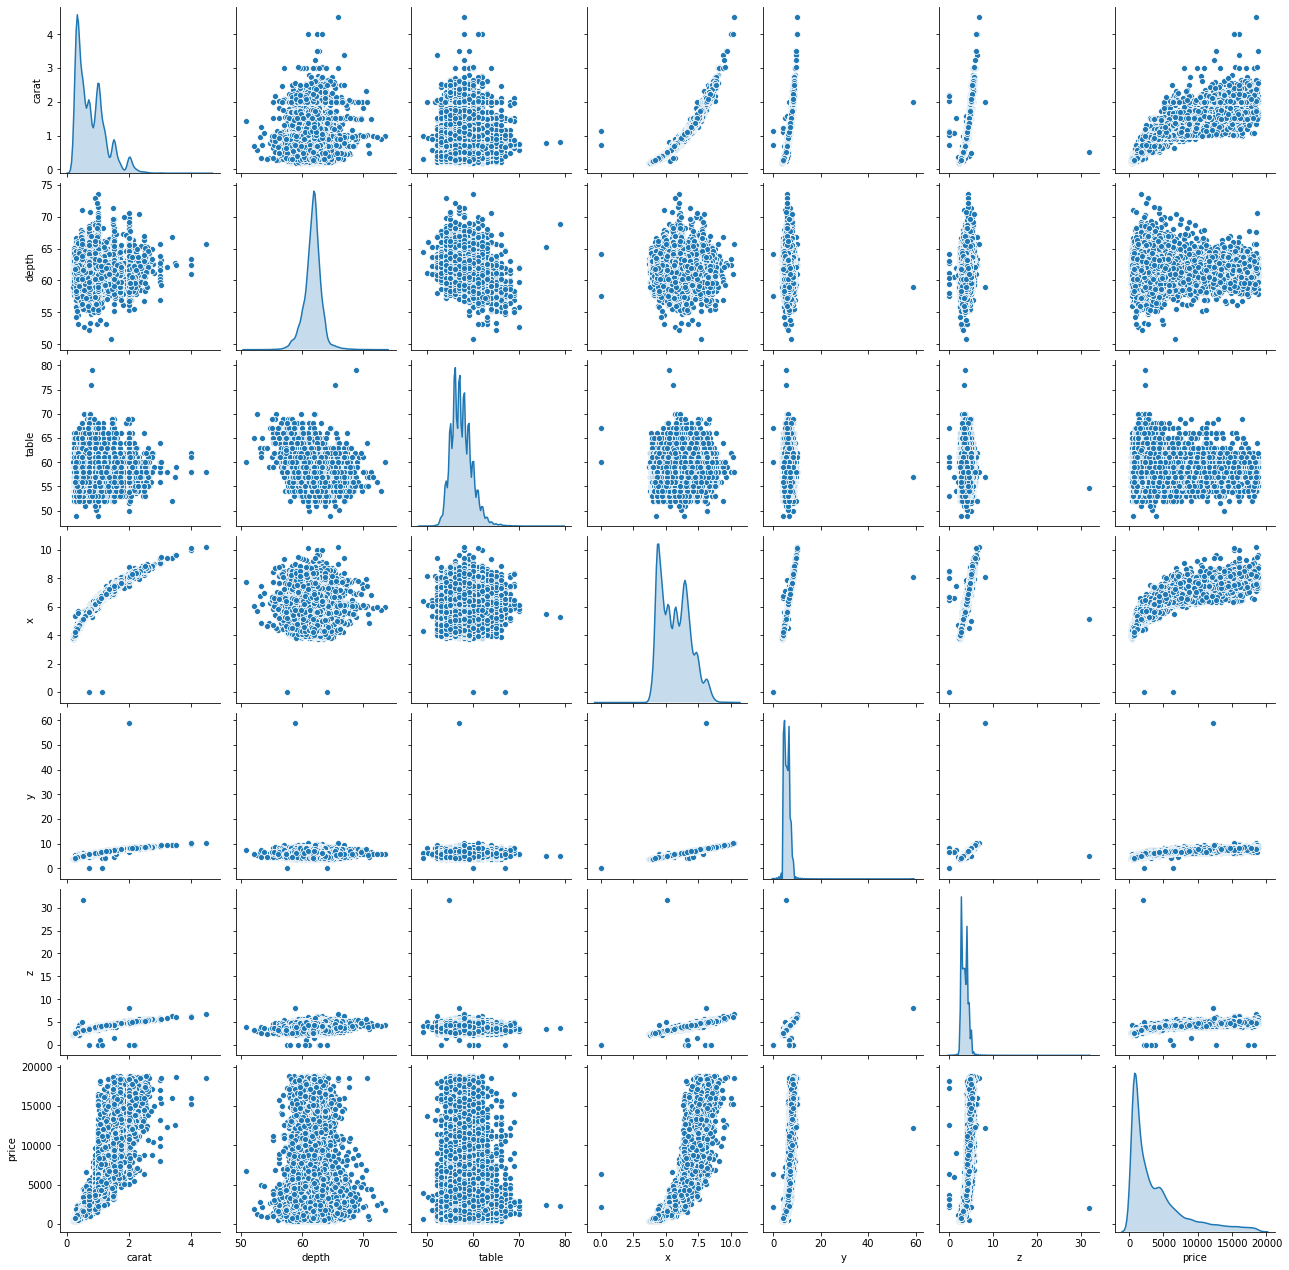

In [814]:
# Bivariate analysis

sns.pairplot(zir, diag_kind='kde')  
plt.show()

In [815]:
# Null value check

zir.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [816]:
zir.depth.mean()

61.745285104437116

In [817]:
# Replacing null values with mean

zir['depth'] = zir.depth.replace(np.NaN, '61.7')

In [818]:
zir.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [819]:
# Here after imputation we will check for data type of imputed variable since it changes after imputation

zir['depth'].dtypes

# yes the Data type is not signified

dtype('O')

In [820]:
# Converting the data type to Float again 

zir['depth'] = zir['depth'].astype(float)
zir['depth'].dtypes

dtype('float64')

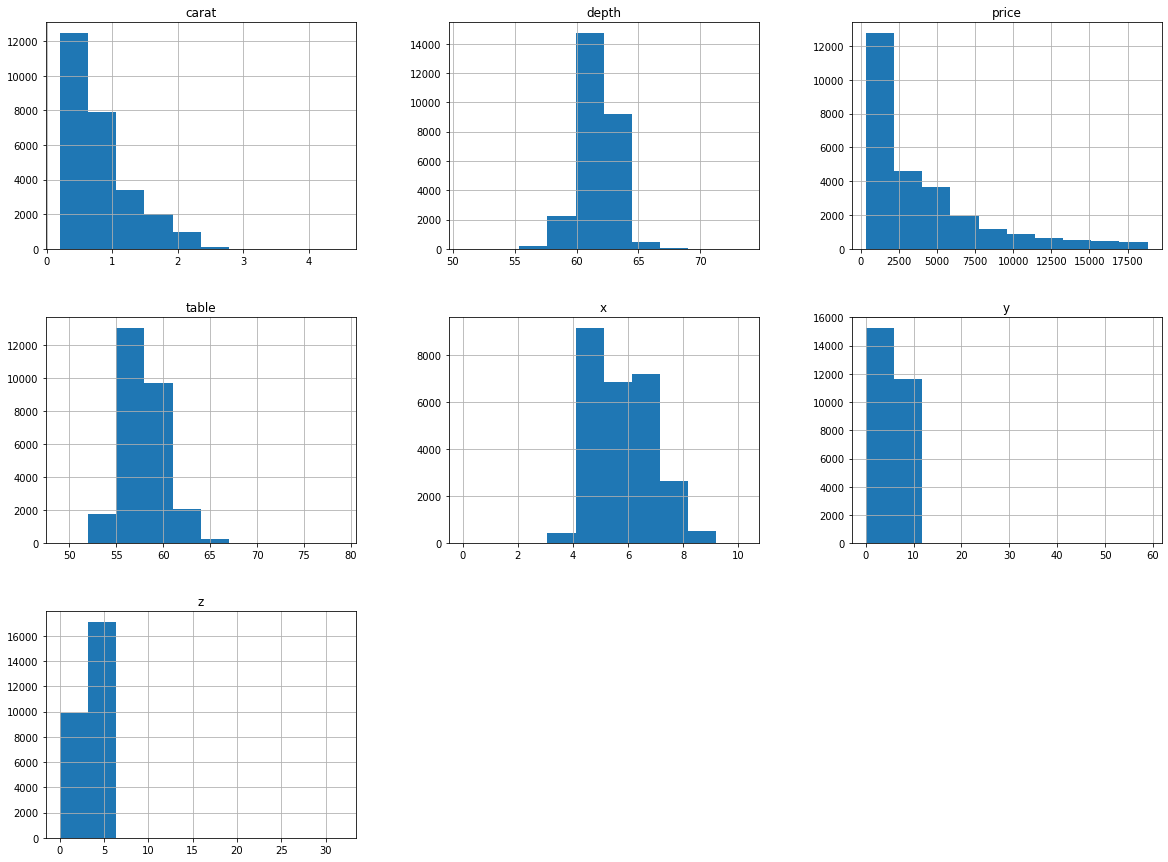

In [822]:
# Univariate analysis.

zir[['carat','depth','table', 'x', 'y', 'z','price']].hist();

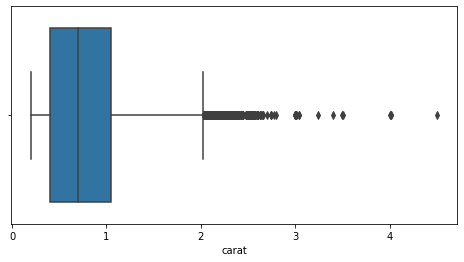

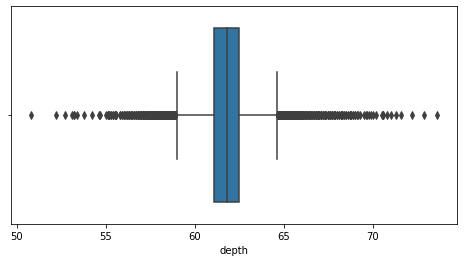

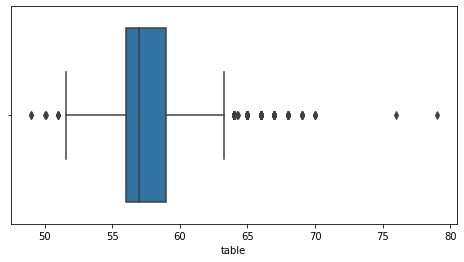

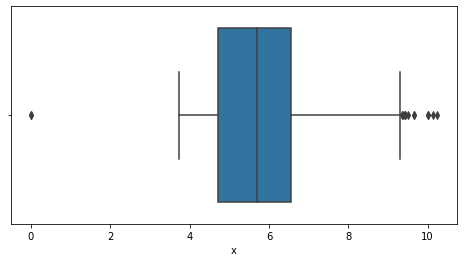

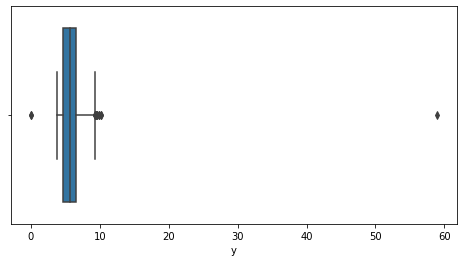

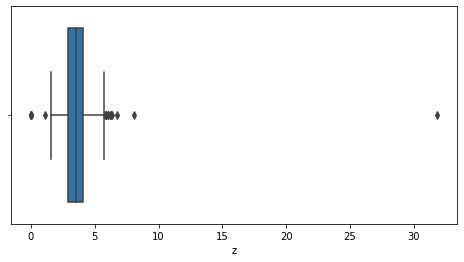

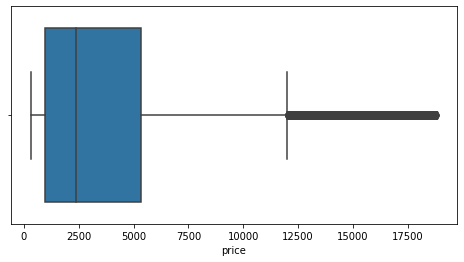

In [828]:
# Outliers check

plt.rcParams['figure.figsize'] = 8,4
cols=['carat','depth','table', 'x', 'y', 'z','price'];
for i in cols:
    sns.boxplot(zir[i])
    plt.show()

In [829]:
# Checking whether they are valid outliers or not

Q1 = zir.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = zir.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR)

In [830]:
lower_range

carat      -0.575
depth      59.000
table      51.500
x           1.950
y           1.965
z           1.190
price   -5671.500
dtype: float64

In [831]:
upper_range

carat        2.025
depth       64.600
table       63.500
x            9.310
y            9.285
z            5.750
price    11972.500
dtype: float64

In [832]:
# Outlier treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr_range= Q1-(1.5 * IQR)
    ur_range= Q3+(1.5 * IQR)
    return lr_range, ur_range

In [833]:
lcarat,ucarat = remove_outlier(zir['carat'])
zir['carat']=np.where(zir['carat']<lcarat,lcarat,zir['carat'])
zir['carat']=np.where(zir['carat']>ucarat,ucarat,zir['carat'])

ldepth,udepth = remove_outlier(zir['depth'])
zir['depth']=np.where(zir['depth']<ldepth,ldepth,zir['depth'])
zir['depth']=np.where(zir['depth']>udepth,udepth,zir['depth'])

ltable,utable = remove_outlier(zir['table'])
zir['table']=np.where(zir['table']<ltable,ltable,zir['table'])
zir['table']=np.where(zir['table']>utable,utable,zir['table'])

lx,ux = remove_outlier(zir['x'])
zir['x']=np.where(zir['x']<lx,lx,zir['x'])
zir['x']=np.where(zir['x']>ux,ux,zir['x'])

ly,uy = remove_outlier(zir['y'])
zir['y']=np.where(zir['y']<ly,ly,zir['y'])
zir['y']=np.where(zir['y']>uy,uy,zir['y'])

lz,uz = remove_outlier(zir['z'])
zir['z']=np.where(zir['z']<lz,lz,zir['z'])
zir['z']=np.where(zir['y']>uz,uz,zir['z'])

lprice,uprice = remove_outlier(zir['price'])
zir['price']=np.where(zir['price']<lprice,lprice,zir['price'])
zir['price']=np.where(zir['price']>uprice,uprice,zir['price'])

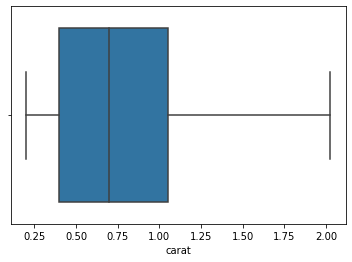

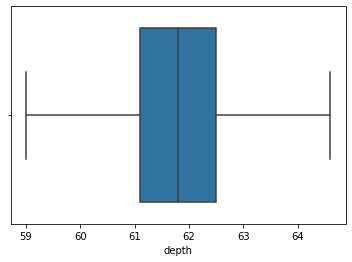

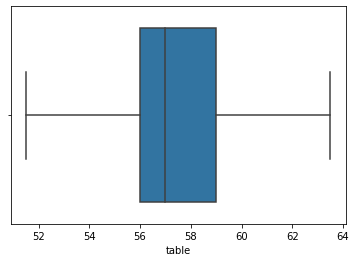

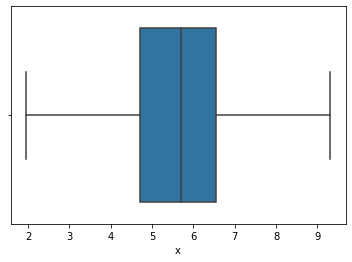

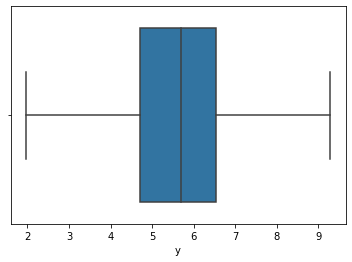

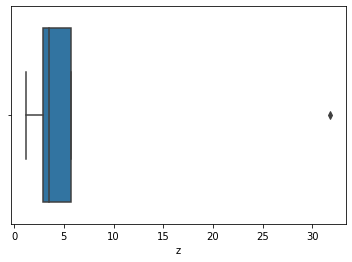

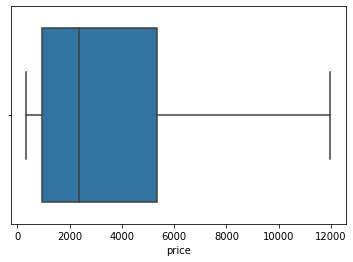

In [778]:
cols=['carat','depth','table', 'x', 'y', 'z','price'];
for i in cols:
    sns.boxplot(zir[i])
    plt.show()

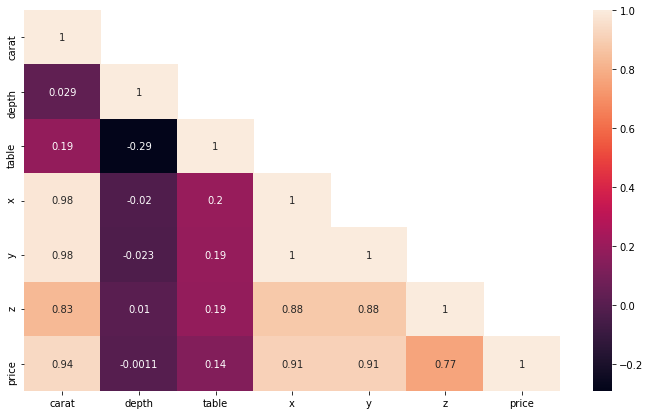

In [834]:
corr = zir.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True,mask=np.triu(corr,+1));

1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [835]:
for variable in zir.columns:
    if zir[variable].dtype == 'object':
        zir[variable] = pd.Categorical(zir[variable]).codes

In [836]:
zir.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [837]:
std_scaler = StandardScaler()
scaled= std_scaler.fit_transform(zir)
scaled

array([[-1.06747072, -0.54174828, -0.94099942, ..., -1.28898214,
        -1.16005166, -0.93330415],
       [-1.00255226,  0.43455861,  0.2314354 , ..., -1.13694318,
        -1.13176033, -0.79345985],
       [ 0.23089845,  1.4108655 , -0.94099942, ...,  0.34767256,
         1.02545306,  0.7361772 ],
       ...,
       [-0.61304151,  0.43455861, -0.94099942, ..., -0.51984387,
        -0.79933729, -0.59969621],
       [-1.13238917,  1.4108655 , -0.35478201, ..., -1.36947335,
        -1.20248864, -0.88053815],
       [ 0.98828046,  0.43455861,  1.99008764, ...,  1.02737614,
         1.02545306,  0.41237279]])

In [838]:
# linear regression model building

X = zir.drop('price', axis=1)


y = zir['price']

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,5.75
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65


In [839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [840]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [841]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9400.004956176555
The coefficient for cut is 38.77639291172349
The coefficient for color is -229.4659010479004
The coefficient for clarity is 250.58221573329405
The coefficient for depth is -123.85516351717881
The coefficient for table is -72.00517310112835
The coefficient for x is -2126.5721065264997
The coefficient for y is 1282.394679733131
The coefficient for z is 69.93368811306236


In [842]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 12126.474882325927


In [843]:
regression_model.score(X_train, y_train)

0.9095761082679287

In [844]:
regression_model.score(X_test, y_test)

0.9101618398907447

Using stats model

In [845]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
8747,1.19,2,1,3,60.2,57.0,6.84,6.87,5.75,5717.0
13821,0.36,2,0,5,61.0,56.0,4.63,4.59,2.81,1094.0
13582,1.20,1,5,2,63.1,58.0,6.66,6.72,5.75,4752.0
9952,0.24,4,1,6,60.7,60.0,4.01,4.06,2.45,485.0
25530,0.50,4,2,7,61.8,56.0,5.11,5.15,3.17,2052.0


In [846]:
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    12126.474882
carat         9400.004956
cut             38.776393
color         -229.465901
clarity        250.582216
depth         -123.855164
table          -72.005173
x            -2126.572107
y             1282.394680
z               69.933688
dtype: float64

In [847]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:50:39   Log-Likelihood:            -1.5775e+05
No. Observations:               18853   AIC:                         3.155e+05
Df Residuals:                   18843   BIC:                         3.156e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.213e+04    613.042     19.781      0.0

In [747]:
# MSE of X_train 

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1041.3235599375653

In [748]:
# y_train

predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1043.1398569398777

In [850]:
# MSE

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [851]:
np.sqrt(mse)

1043.1398569398784

In [852]:
y_pred = regression_model.predict(X_test)

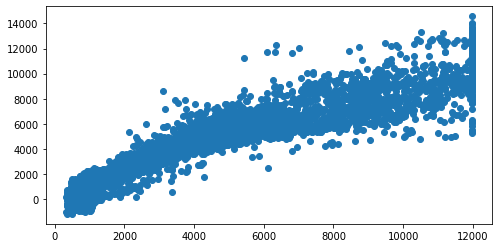

In [853]:
plt.scatter(y_test, y_pred)

In [854]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(12126.47) * Intercept + (9400.0) * carat + (38.78) * cut + (-229.47) * color + (250.58) * clarity + (-123.86) * depth + (-72.01) * table + (-2126.57) * x + (1282.39) * y + (69.93) * z + 

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Please find answer in business report

# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

Variable Name --------------- Description

Holiday_Package ------------> Opted for Holiday Package yes/no?

Salary ---------------------> Employee salary

age ------------------------> Age in years

edu ------------------------> Years of formal education

no_young_children ----------> The number of young children (younger than 7 years)

no_older_children ----------> Number of older children

foreign --------------------> foreigner Yes/No

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

Data Ingestion

In [855]:
# load the dataset

HP = pd.read_csv('Holiday_Package.csv')
HP.head(8)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no


In [856]:
HP.drop(columns = 'Unnamed: 0', inplace = True)

In [857]:
HP.shape

(872, 7)

In [858]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [859]:
HP.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [860]:
dups = HP.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
HP[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [861]:
HP.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


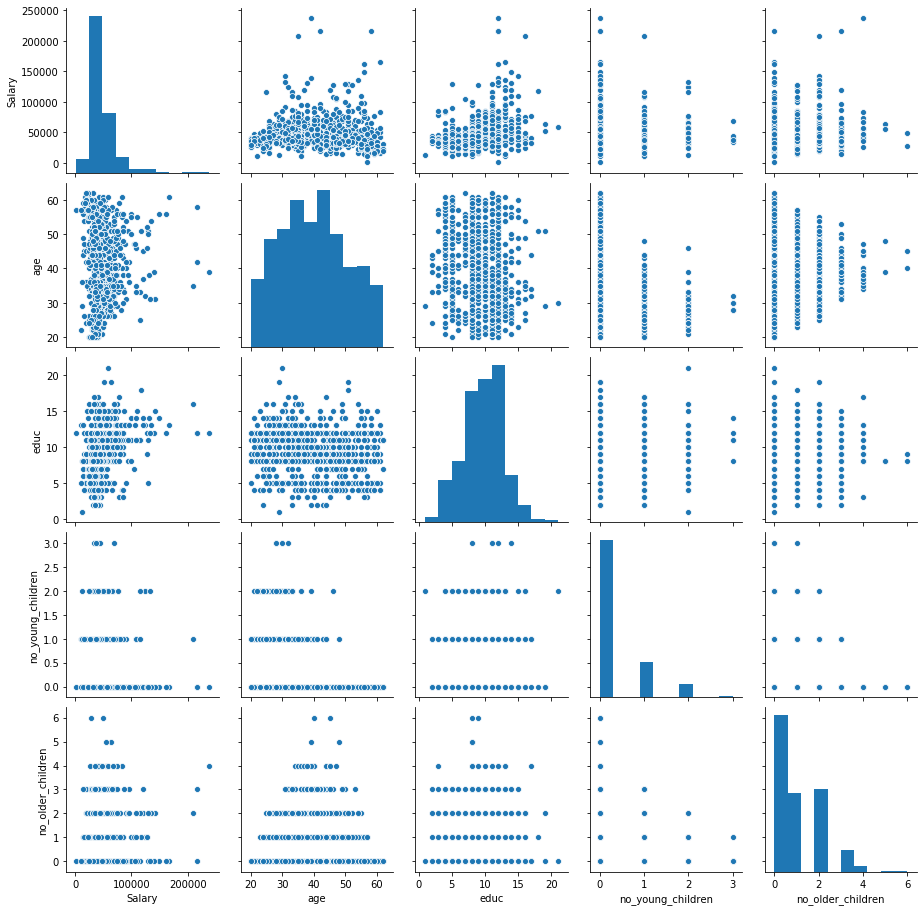

In [862]:
# Bivariate analysis

sns.pairplot(HP)

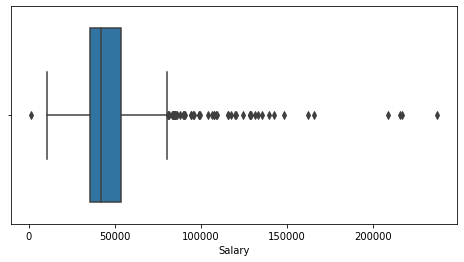

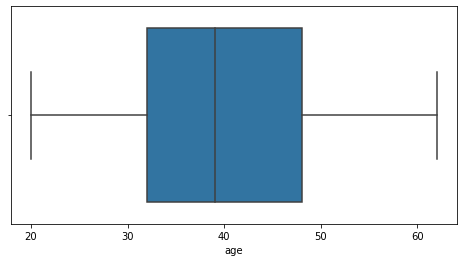

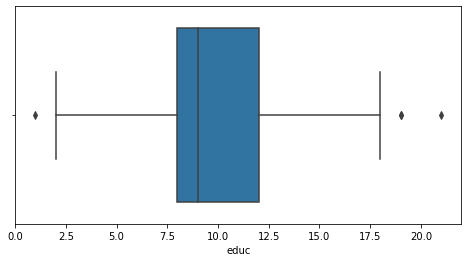

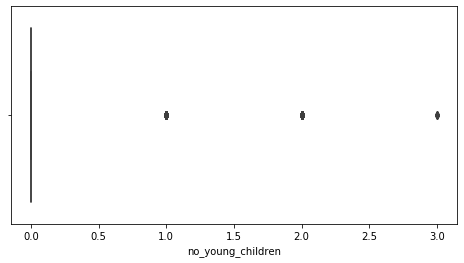

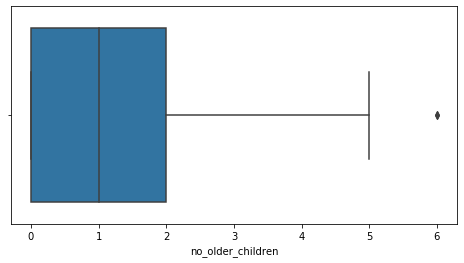

In [863]:
# Univariate analysis

cols=['Salary', 'age', 'educ', 'no_young_children','no_older_children'];
for i in cols:
    sns.boxplot(HP[i])
    plt.rcParams['figure.figsize'] = 8,4
    plt.show()

In [864]:
Q1 = HP.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = HP.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR)

In [865]:
lower_range

Salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64

In [866]:
upper_range

Salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64

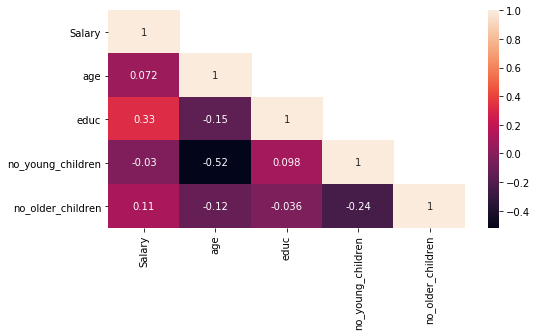

In [867]:
corr = HP.corr()
sns.heatmap(corr, annot = True, mask=np.triu(corr,+1))

In [868]:
HP.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [870]:
# Check for unique values

for column in HP[['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign']]:
    print(column.upper(), ':', HP[column].nunique())
    print(HP[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE : 2
yes    401
no     471
Name: Holliday_Package, dtype: int64


SALARY : 864
53846    1
51077    1
36800    1
36855    1
67573    1
        ..
44280    2
40270    2
46195    2
33357    2
39460    2
Name: Salary, Length: 864, dtype: int64


AGE : 43
62     3
61     8
20     8
22     9
60    10
53    10
23    11
21    12
52    13
59    14
54    14
58    16
24    16
55    17
25    17
57    18
56    18
30    19
29    19
27    19
48    20
37    21
43    21
50    21
51    22
45    23
49    23
42    24
46    24
26    24
39    25
47    26
41    26
32    27
36    28
38    28
40    29
28    29
33    30
35    31
34    32
31    32
44    35
Name: age, dtype: int64


EDUC : 20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN : 4
3      5
2     55
1    147
0    665
Name: no_young_children, 

In [871]:
percentage = HP.Holliday_Package.value_counts(normalize = True)
percentage*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

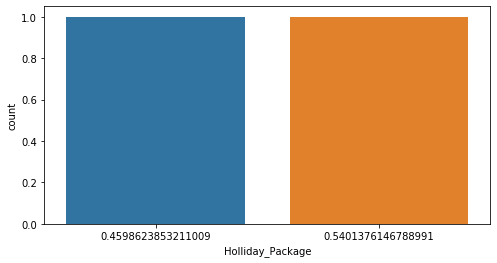

In [872]:
sns.countplot(percentage)

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

                                                      &
                                                      
2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [873]:
# Encoding the data

for variable in HP.columns:
    if HP[variable].dtype == 'object':
        HP[variable] = pd.Categorical(HP[variable]).codes

In [874]:
HP.dtypes

Holliday_Package      int8
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

In [875]:
HP.Holliday_Package.value_counts(normalize = True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021138CE4E48>,
      dtype=object)

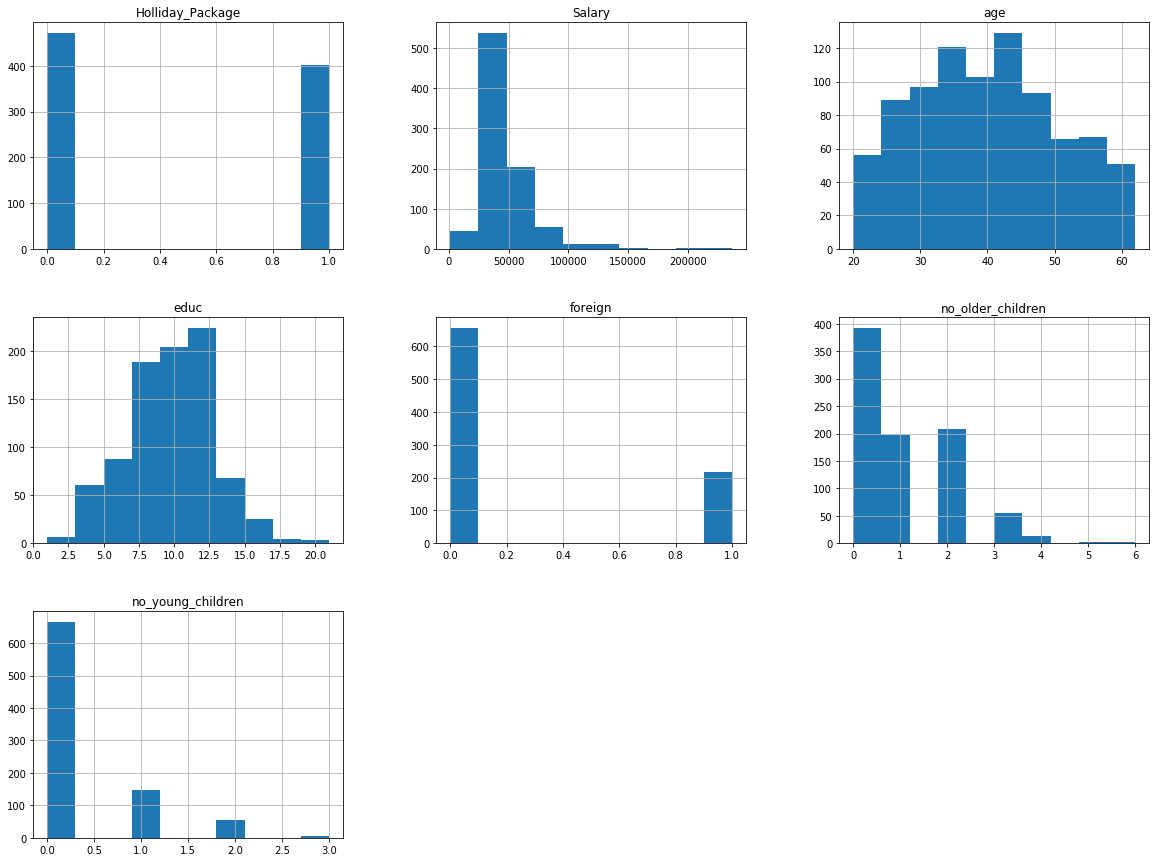

In [877]:
HP.hist()

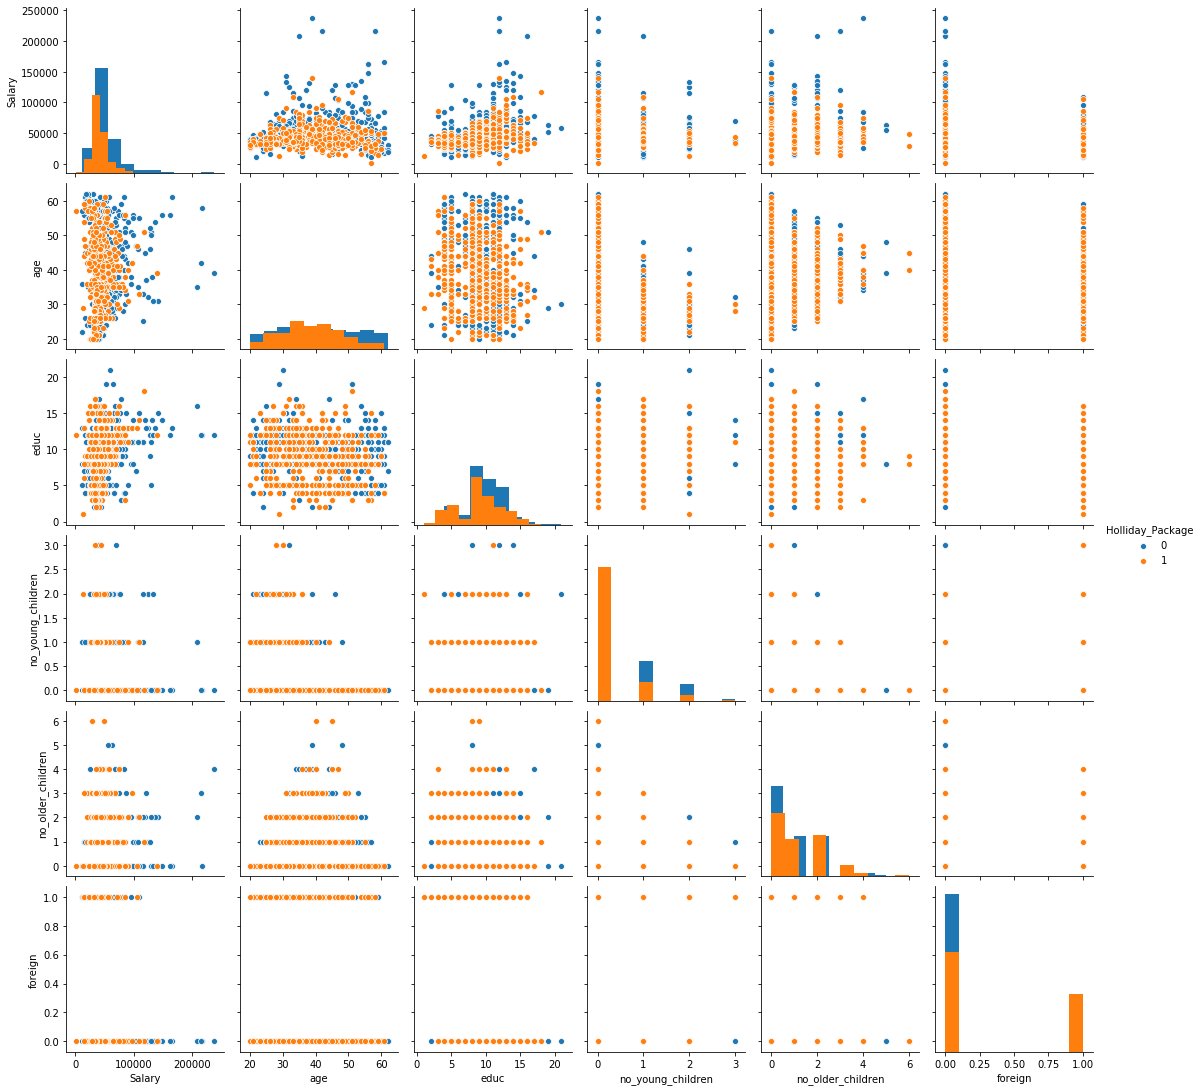

In [883]:
sns.pairplot(HP, diag_kind = 'hist', hue='Holliday_Package');

In [884]:
X = HP.drop('Holliday_Package', axis=1)

Y = HP['Holliday_Package']

In [885]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [886]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [887]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [888]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


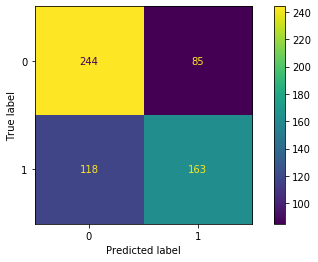

In [892]:
plot_confusion_matrix(model,X_train,Y_train);
plt.rcParams['figure.figsize'] = 10,8

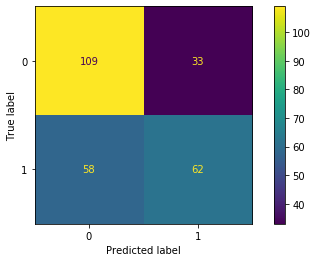

In [902]:
plot_confusion_matrix(model,X_test,Y_test);
plt.rcParams['figure.figsize'] = 5,4

In [903]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,Ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,Ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



Train AUC: 0.735


Text(0.5, 1.0, 'ROC')

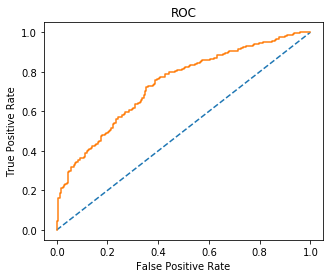

In [907]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

Test AUC: 0.735


Text(0.5, 1.0, 'ROC')

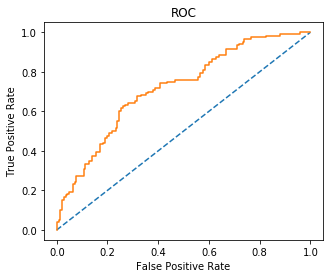

In [906]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# LDA Model

In [908]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [909]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

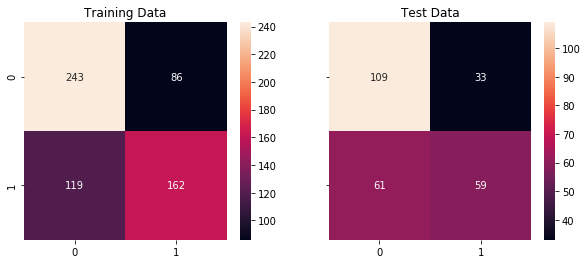

In [915]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.rcParams['figure.figsize'] = 5,15

In [917]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [918]:
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


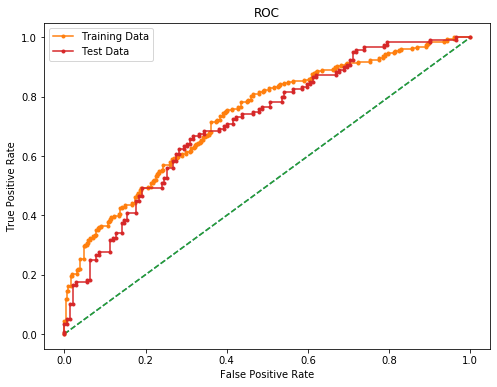

In [944]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
plt.rcParams['figure.figsize'] = 10,8

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


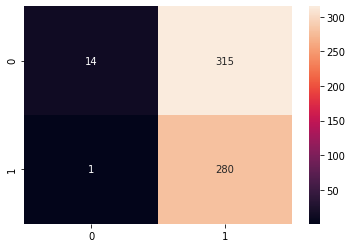

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


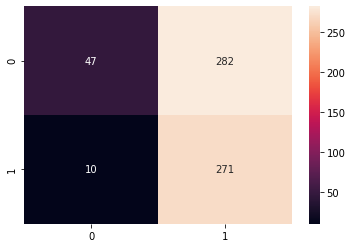

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


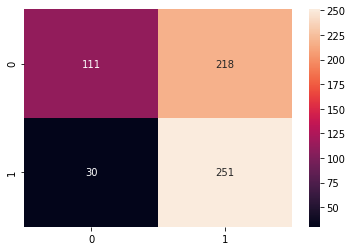

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


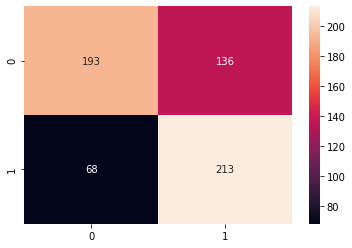

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


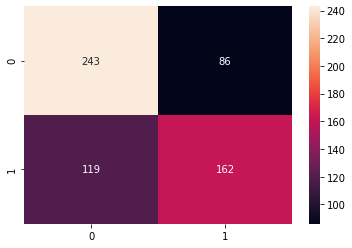

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


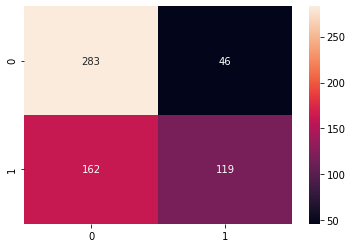

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


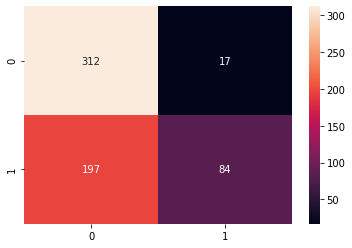

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


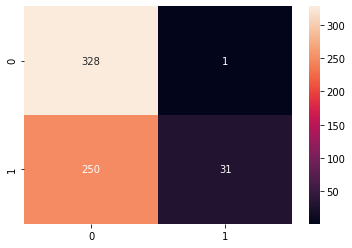

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


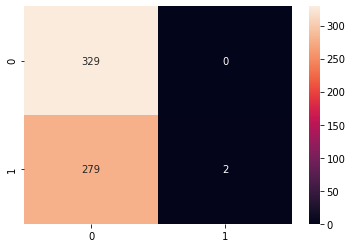

In [983]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            # 0.02069932 > 0.1
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [984]:
#Predicting the classes on the train data

custom_cutoff_pred_data=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    custom_cutoff_pred_data.append(a)

In [948]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

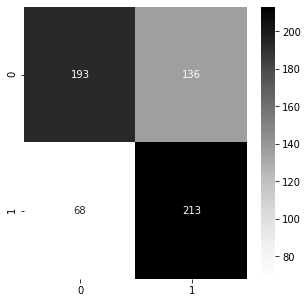

In [988]:
# Train data

sns.heatmap((metrics.confusion_matrix(Y_train,custom_cutoff_pred_data)),annot=True,fmt='.5g',cmap='Greys');
plt.rcParams['figure.figsize'] = 10,8

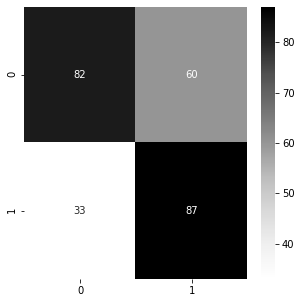

In [953]:
# Test data

sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');
plt.rcParams['figure.figsize'] = 10,5

In [990]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(Y_train,custom_cutoff_pred_data),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.74      0.59      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.66       610
 



In [991]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



In [992]:
# Models comparison

logistic_train_acc = 0.67
logistic_train_auc = 0.73
logistic_train_recall = 0.58
logistic_train_precision = 0.66
logistic_train_f1 = 0.62

logistic_test_acc = 0.65
logistic_test_auc = 0.73
logistic_test_recall = 0.52
logistic_test_precision = 0.65
logistic_test_f1 = 0.58

LDA_train_acc = 0.67
LDA_train_auc = 0.73
LDA_train_recall = 0.76
LDA_train_precision = 0.61
LDA_train_f1 = 0.68

LDA_test_acc = 0.65
LDA_test_auc = 0.71
LDA_test_recall = 0.72
LDA_test_precision = 0.59
LDA_test_f1 = 0.65

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'logistic Train':[logistic_train_acc,logistic_train_auc,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'logistic Test':[logistic_test_acc,logistic_test_auc,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]},index=index)
round(data,2)

,logistic Train,logistic Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.67,0.65
AUC,0.73,0.73,0.73,0.71
Recall,0.58,0.52,0.76,0.72
Precision,0.66,0.65,0.61,0.59
F1 Score,0.62,0.58,0.68,0.65


2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Please find answer in Business report

                                               THE END